In this first we will do an EDA, explore OLS models, then come to a conclusion that it is better to use Monte Carlo Simulation

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv(r"medical_cost.csv")
data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [5]:
data.isna().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# 🔍 Our dataset is small, but clean, but before we start Machine Learning we will like to comment on the quality of the data.
# We first need to do an analysis on the appropriateness of the data.
# For this we will do a study on the uncertainty in the data, following discussion will shed light on the problem and the method we are going to implement to study it.

In [7]:
# The uncertainty in a dataset affects how well machine learning models generalize.
# ✅ Low Uncertainty → Easier to generalize, even with small data.
# ❌ High Uncertainty → Harder to generalize, requires more data.

In [8]:
# 🔍 1️⃣ One way to gauge it is by seeing the distribution of the target variable?
# 📌 Understanding Uncertainty from a Probability Distribution.
# When we find that charges follows a specific probability distribution, we gain insights into:

# ✅ How predictable charges are → A well-fitting distribution means charges are not random but follow a pattern.
# ✅ The likelihood of extreme values → A long right tail (e.g., in Gamma or Log-Normal) means high-cost cases are rare but possible.
# ✅ How much variance exists → Wide distributions mean charges have high uncertainty, while narrow ones indicate low uncertainty.

# 📌 Understanding Uncertainty from descriptive statistics
# ✅ If standard deviation is high, predictions will be more uncertain.
# ✅ If skewness is high, extreme cases (e.g., very high medical costs) are harder to predict.

# 📌 Understanding Uncertainty from inferential statistics
# ✅ If the confidence interval is very wide, predictions are highly uncertain.
# ✅ If it is narrow, predictions are more reliable.

In [ ]:
# 🔍 2️⃣ Another way to gauge uncertainty is to use 10-20 random states and see the variance in the model performance.
# ✅ Variacnce is low - model is stable.
# ❌ Variance is high - model is unstable.
# We can do the feature engineering on the features to explore if the raw data of features is causing the uncertainty.
# If after feature engineering the variance is low, then the raw data of features might be causing the uncertainty.
# We redo our random state test after feature engineering to see if the variance is low.
# ✅ Iif variance is low then we can comment that transformation dealt with the uncertainty.
# ❌ If variance is still high, then the model is unstable.
# At this point we will use other OLS too. Regularization based LR are not scale invariant. OlS's scale invariant as long as there the relative position of the data points remains same. Thielsen regressor, unlike OLS is robust regressor we will train it too.

In [10]:
# 🔍 3️⃣ Another way to comment on uncertaity is by stydying the Monte Carlo simulation. 
# We will rely on Cumulative Probabilty for modeling the findings from the monte carlo

In [ ]:
# 🔍 This we will study diabetes dataset of sklearn.
# 👉 Then comapare the stability issue
# Since we are working on the LR we will just stop after commenting on the stability of the LR model.

In [ ]:
# 📌 Outline of the approach we (me and LLMs) will take.
# 1. First we will see if target fits into a distribution, if yes then we can comment that given the uncertainty data follows a pattern of that distribution.
# 2. Then we will see if the model is stable using 10-20 seeds, we can then comment on the uncertainty of that data.
# 3. Then we will engineer the features.
# 4. Then we will see if the new model is stable using 10-20 seeds, also we will use more OLS based models, lasso, ridge. 
# 5. Then we will do the hypothesis testing on the features, if results are same we can comment that uncertainty was because of the raw data.
# 6. If results are different, we can comment that we failed to remove the uncertainty.
# 5. Then we will study the diabetes dataset.
# 6. Then we will do a comparison of the stability of the models. After this we can have a foundation to comment the quality of the data for the linear regression algorithm.
# 7. We will do a monte carlo similation to tell that randomness indeed intrisnic iff the there is high variance after the simulation.

1- EDA First Look 

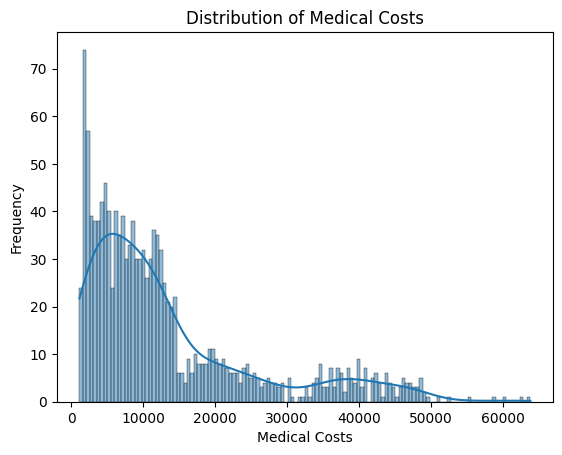

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data["charges"], kde=True, bins=130)
plt.xlabel("Medical Costs")
plt.ylabel("Frequency")
plt.title("Distribution of Medical Costs")
plt.show()

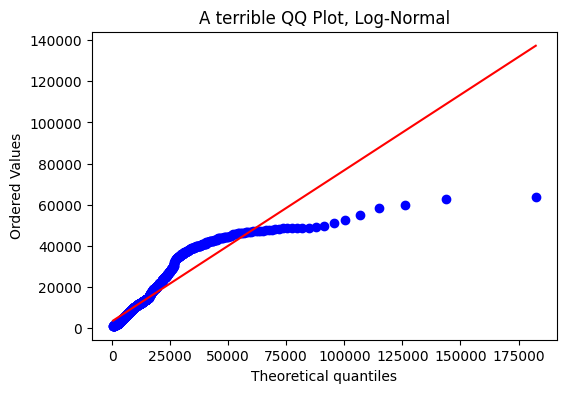

In [14]:
# looks like a log-normal distribution, we can check this by doing a QQ plot
import scipy.stats as stats

shape, loc, scale=stats.lognorm.fit(data["charges"], floc=0)  # floc=0 fixes location at 0
plt.figure(figsize=(6,4))
stats.probplot(data["charges"], dist="lognorm", sparams=(shape, loc, scale), plot=plt)
plt.title("A terrible QQ Plot, Log-Normal")
plt.show()

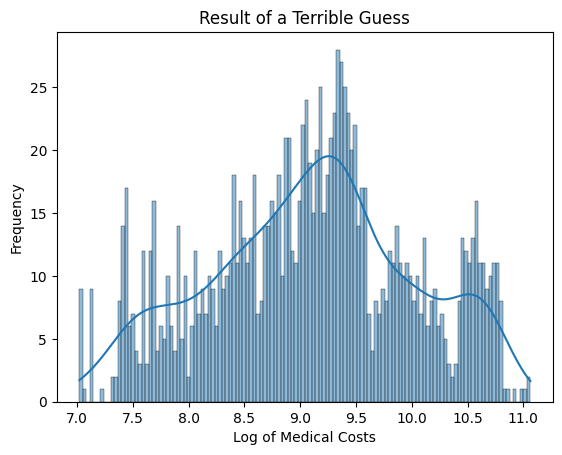

In [15]:
sns.histplot(np.log(data["charges"]), kde=True, bins=130)
plt.xlabel("Log of Medical Costs")
plt.ylabel("Frequency")
plt.title("Result of a Terrible Guess")
plt.show()

In [16]:
from joblib import Parallel, delayed
from fitter import Fitter
import traceback
import warnings
warnings.filterwarnings("ignore")

In [17]:
continuous_distributions=[d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]

def fit_dist(var_data, dist_names):
    try:
        a=Fitter(var_data, distributions=dist_names, timeout=30)
        a.fit()
        return a
    except Exception as e:
        print(traceback.print_exc())

def split_list(input_list, n):
    k, m=divmod(len(input_list), n)
    return [input_list[i * k + min(i, m):(i + 1) * k + min(i + 1, m)] for i in range(n)]

continuous_distributions=split_list(continuous_distributions, 20)

results=Parallel(n_jobs=10)(delayed(fit_dist)(data["charges"],y) for y in continuous_distributions)

2025-03-18 14:11:35.273 | WARNING  | fitter.fitter:plot_pdf:419 - kstwo was not fitted. no parameters available
2025-03-18 14:11:35.328 | WARNING  | fitter.fitter:plot_pdf:419 - levy_stable was not fitted. no parameters available
2025-03-18 14:11:35.627 | WARNING  | fitter.fitter:plot_pdf:419 - skewnorm was not fitted. no parameters available
2025-03-18 14:11:35.631 | WARNING  | fitter.fitter:plot_pdf:419 - studentized_range was not fitted. no parameters available
2025-03-18 14:11:35.631 | WARNING  | fitter.fitter:plot_pdf:419 - t was not fitted. no parameters available


Best Fit
({'pareto': {'b': 22626400.359003153, 'loc': -274877905822.12598, 'scale': 274877906943.99985}}, 4.181003984275645e-09)


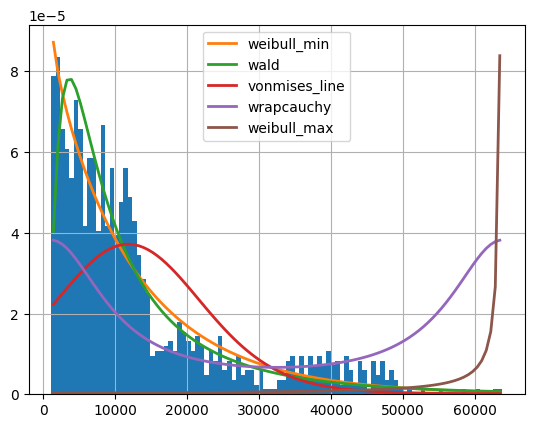

In [18]:
best_fit_=None
lowest_sse=float("inf")
for i in results:
    best_fit=i.get_best()
    sse_of_best=i.summary().loc[list(best_fit.keys())[0], "sumsquare_error"]
    if sse_of_best<lowest_sse:
        lowest_sse=sse_of_best
        best_fit_=(best_fit, sse_of_best)
print("Best Fit")
print(best_fit_)

In [19]:
# 👉 It seems we have many great fits as per the SSE, but pareto gave minimum sse
# now this established, we can say output is not totally random, and since it followes pareto extreme outliers will be common
# it has a long tail, LR our focus model will struggle, our data is super challenging for LR 
# it is wide dist, so uncertainty is certainly high

2- Testing on 10 Seeds

In [20]:
data=pd.concat([data, pd.get_dummies(data[["region"]])], axis=1)
data=data.drop(["Id", "region"], axis=1)

In [21]:
data["sex"]=data["sex"].map({"female":0, "male":1})
data["smoker"]=data["smoker"].map({"yes":1, "no":0})

In [22]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [23]:
data=data.replace({True: 1, False: 0})
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [24]:
data_fresh = data

In [25]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

x=data.drop("charges", axis=1)
y=data["charges"]

a=[]
for i in range(0,10):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
    model=LinearRegression(n_jobs=-1)
    cv_scores=list(cross_val_score(model, x_train, y_train, scoring="r2", cv=6, n_jobs=-1))
    a.append(cv_scores)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    a[i].extend([model.score(x_test, y_test)])
    a[i].extend([model.score(x_train, y_train)])
    a[i].extend([root_mean_squared_error(y_test, pred)])

cols=["seed_cv_r2_"+str(i) for i in range(0,6)]+["test_r2", "train_r2", "test_rmse"]
testing_scores=pd.DataFrame(a,columns=cols)

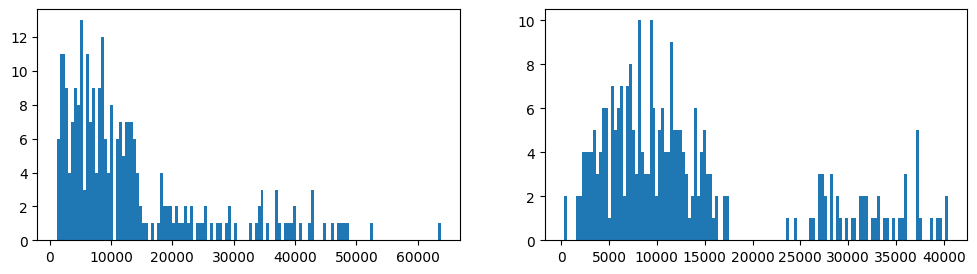

In [26]:
h=pd.Series(pred)
_, axes = plt.subplots(1, 2, figsize=(12,3))
counts, bin_edges, _=axes[0].hist(y_test, bins=130)
counts, bin_edges, _=axes[1].hist(h, bins=130)

In [27]:
# just by looking at the histograms we can see that results suffered

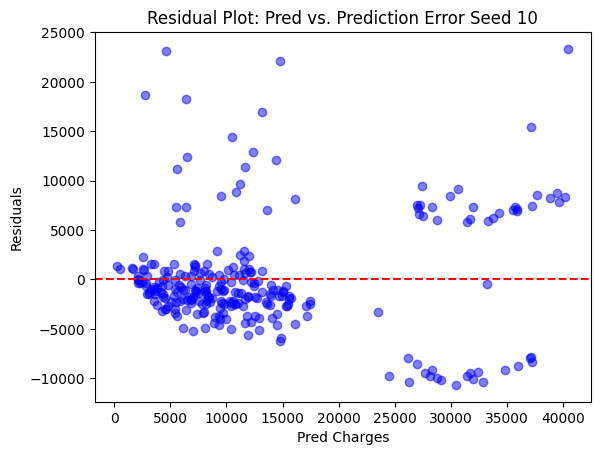

In [28]:
residuals = y_test - pred
plt.scatter(pred, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Pred Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot: Pred vs. Prediction Error Seed 10")
plt.show()

In [29]:
# Residuals vs. Fitted Values: This is the most basic plot, used to check for non-linearity, unequal error variances, or patterns in the residuals. 
# we find nothing, except that tail values as expected are the culprits and there are outliers in non tail values too

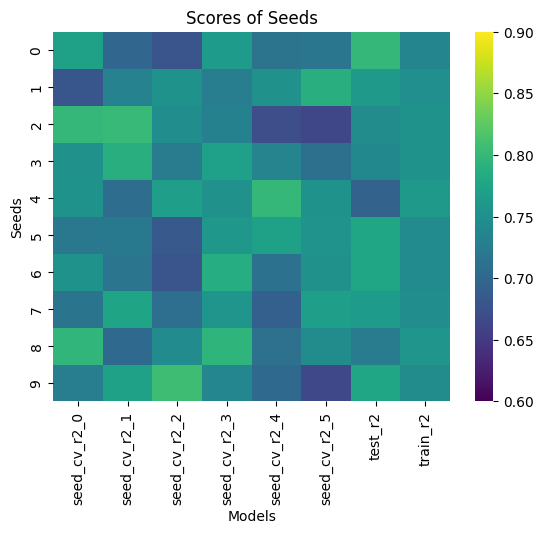

In [30]:
sns.heatmap(testing_scores.drop(["test_rmse"], axis=1), cmap="viridis", cbar=True, yticklabels=True, xticklabels=True, vmin=0.6, vmax=0.9)
plt.xlabel("Models")
plt.ylabel("Seeds")
plt.title("Scores of Seeds")
plt.show()

In [31]:
# r2 might be explaining that things are good
# but rmse scores are over the roof

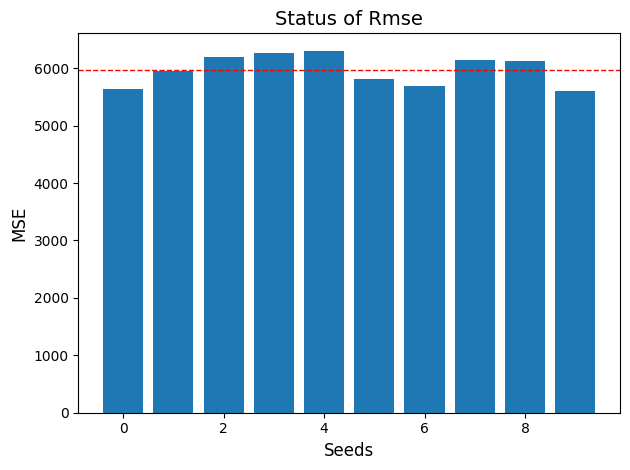

In [32]:
plt.bar(testing_scores.index, testing_scores["test_rmse"])
plt.axhline(y=testing_scores["test_rmse"].mean(), color="red", linestyle="--", linewidth=1)
plt.xlabel("Seeds", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.title("Status of Rmse", fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
testing_scores["mean_testing"]=testing_scores.apply(lambda x: x[:-3].mean(), axis=1)
testing_scores["std_testing"]=testing_scores.apply(lambda x: x[:-3].std(), axis=1)

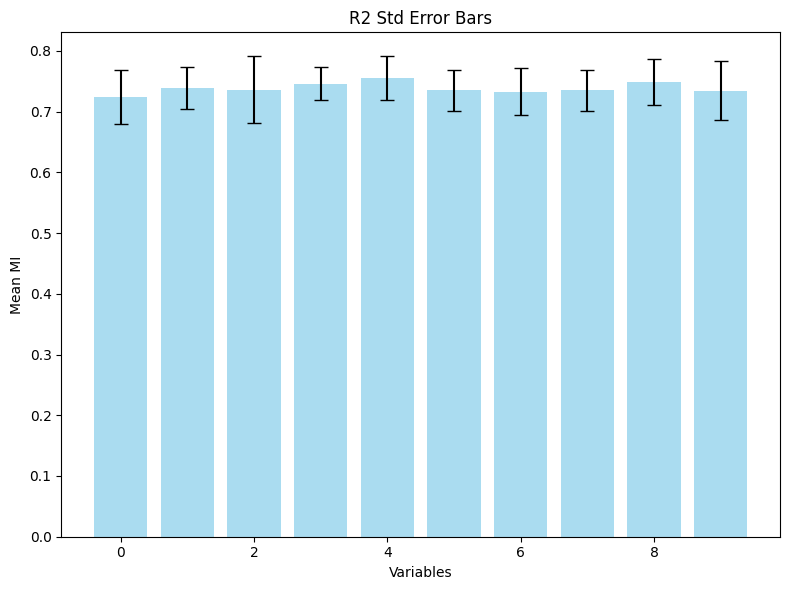

In [34]:
plt.figure(figsize=(8, 6))
plt.bar(testing_scores.index, testing_scores["mean_testing"], yerr=testing_scores["std_testing"], capsize=5, color='skyblue', alpha=0.7)
plt.xlabel("Variables")
plt.ylabel("Mean MI")
plt.title("R2 Std Error Bars")
plt.tight_layout()
plt.show()

In [35]:
testing_scores.sort_values(by="test_rmse", ascending=True).head()

,seed_cv_r2_0,seed_cv_r2_1,seed_cv_r2_2,seed_cv_r2_3,seed_cv_r2_4,seed_cv_r2_5,test_r2,train_r2,test_rmse,mean_testing,std_testing
9,0.725558,0.770555,0.806837,0.737469,0.701649,0.664735,0.777543,0.744148,5608.118993,0.734467,0.048577
0,0.771557,0.697632,0.679037,0.763536,0.714348,0.717776,0.799988,0.737026,5641.626559,0.723981,0.044018
6,0.751422,0.716627,0.677774,0.786223,0.713524,0.750343,0.777257,0.743816,5685.278144,0.732652,0.038460
5,0.720050,0.721788,0.682653,0.759602,0.771282,0.754031,0.778110,0.743047,5803.487605,0.734901,0.034211
1,0.680011,0.732974,0.751301,0.725824,0.750853,0.789661,0.762331,0.747768,5956.454718,0.738437,0.034243


In [36]:
raw_rmse = testing_scores["test_rmse"]

In [37]:
# so what is happening we have good R2 but terrible RMSE?

3- Feature Engineering

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# data["charges"] = np.log1p(data["charges"])

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = ["age","bmi"]
data_poly = pd.DataFrame(poly.fit_transform(data[poly_features]), columns=poly.get_feature_names_out(poly_features))
data = pd.concat([data.drop(columns=poly_features), data_poly], axis=1)

# data["age"] = np.log(data["age"])
# data["bmi"] = np.log(data["bmi"])

4- Test the Data on 10 Seeds, and Also Train Lasso, Ridge, Elasticnet and Thielsen Regression 

In [ ]:
x=data.drop(["charges"], axis=1)
y=data["charges"]

from sklearn.linear_model import Lasso, Ridge, TheilSenRegressor, ElasticNet
from sklearn.feature_selection import mutual_info_regression

b=[]
for j in [LinearRegression, Lasso, Ridge, TheilSenRegressor]:
    model=j()
    a=[]
    for i in range(0,10):
        a.append([j.__name__+str(i)])
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
        xx = pd.DataFrame(x_train, columns=x.columns)
        mi_scores = mutual_info_regression(xx, y_train)
        mi_scores = pd.Series(mi_scores, index=x.columns).sort_values(ascending=False)
        top_4_features = mi_scores.head(4).index.tolist()
        xt=pd.DataFrame(x_test, columns=x.columns)
        cv_scores=list(cross_val_score(model, x_train, y_train, scoring="r2", cv=6, n_jobs=-1))
        a[i].extend(cv_scores)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        a[i].extend([model.score(x_test, y_test)])
        a[i].extend([model.score(x_train, y_train)])
        a[i].extend([root_mean_squared_error(y_test, pred)])
        # a[i].extend([root_mean_squared_error(np.exp(y_test), np.exp(pred))])
        # print(f"Imp features: {top_4_features}")
    b.append(a)

In [40]:
cols=["model"]+["seed_cv_r2_"+str(i) for i in range(0,6)]+["test_r2", "train_r2", "test_rmse"]
testing_scores=pd.DataFrame()
for i in b:
    testing_scores=pd.concat([testing_scores, pd.DataFrame(i,columns=cols)])

5- Hypothesis Testing

In [41]:
engineered_rmse = testing_scores[testing_scores["model"].astype(str).str.contains("linear", case=False, na=False)]["test_rmse"]

<Axes: >

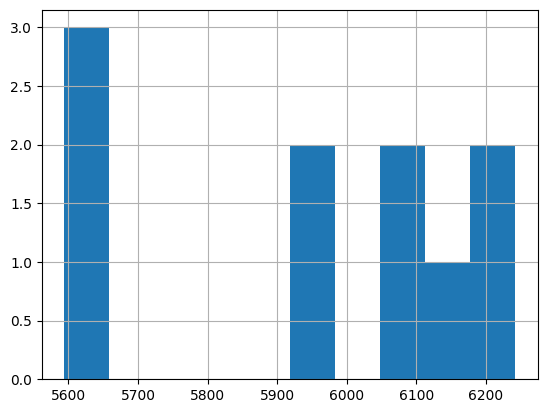

In [42]:
engineered_rmse.hist()

In [43]:
# lets use Wilcoxson signed ranked tests istead of paired t test for comparison, since histogram says so

In [44]:
from scipy.stats import wilcoxon

# It tests whether the median difference between two paired samples is significantly different from zero.
stat, p_value = wilcoxon(raw_rmse, engineered_rmse)
print(f"Wilcoxon Statistic: {stat}, P-value: {p_value}")

Wilcoxon Statistic: 10.0, P-value: 0.083984375


In [45]:
# p value indicates the two rmse's values are the same

In [46]:
## fun excercise
data = data_fresh
x = data.drop(columns=["charges"])
y = data["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

weights_1 = 1 / y_train  # Inverse of Target
weights_2 = 1 / (y_train ** 2)  # Inverse of Squared Target
weights_3 = np.where(y_train < np.percentile(y_train, 90), 1, 0.5)  # Percentile-Based Weighting

models = {}
rmse_results = {}

for i, weights in enumerate([weights_1, weights_2, weights_3], start=1):
    model_weighted = LinearRegression()
    model_weighted.fit(x_train, y_train, sample_weight=weights)
    y_pred_weighted = model_weighted.predict(x_test)
    rmse_weighted = root_mean_squared_error(y_test, y_pred_weighted)
    models[f"Weighted Model {i}"] = model_weighted
    rmse_results[f"Weighted Model {i}"] = rmse_weighted

for model_name, rmse in rmse_results.items():
    print(f"{model_name} RMSE: {round(rmse, 2)}")

Weighted Model 1 RMSE: 6598.72
Weighted Model 2 RMSE: 7378.68
Weighted Model 3 RMSE: 6173.2


In [47]:
# 🔍 Not - shown
# top 3-5 feautes were tested if was seen 3 and 5 gave similar results as thot of raw data and while in 3 the rmse doubled, so it is safe to say age, bmi and smoker are the most imp attributes
# elasticnet performed worst
# log transforming the target distributions and not age and bmi resulted in a lot greater rmses, and vice versa
# logging both the dmi and age and the target resulted in worsened results
# introducing standard scalar worsened the thielsen results

In [48]:
# 🔍 Shown
# regression is perfoming worse than LR and so does Median based thielsen regression
# even after only top 5 features the results were nearly same as without it, only a few features are relevant
# our feature engineering failed, as results of Wilcoxson signed ranked tests before treatment points that there is no different our feature engineering failed
# is the distribution of the target variable the major culprit for sure?

In [49]:
## Uncertainty Analysis
## Results of distribution study of the target variable- 
# target follows pareto distribution
## Results of testing on raw data 10 seeds, only LR was tested-
# Residuals vs. Fitted Values: we find nothing, except that tail values as expected are the culprits and there are outliers in non tail values too
# 6k-6.5k rmse was observed
## feature engineering results, 10 seeds, LR, Lasso, Ridge, thielsen, and elasticnet were tested 
# top 3-5 feautes were tested if was seen 3 and 5 gave similar results as thot of raw data, 6k-6.5k rmse
# and while in 3 the rmse doubled, so it is safe to say age, bmi and smoker are the most imp attributes 11k-12k rmse
# elasticnet performed worst - 11k rmse was observed
# log transforming the target distributions and not age and bmi resulted in a lot greater rmses, and vice versa, 8k-11k rmse was observed
# logging both the dmi and age and the target resulted in worsened results
# introducing standard scalar worsened the thielsen results
# regression is perfoming worse than LR and so does Median based thielsen regression
# even after only top 5 features the results were nearly same as without it, only a few features are relevant
# our feature engineering failed, as results of Wilcoxson signed ranked tests before treatment points that there is no different our feature engineering failed
## Findings about r2-
# r square was similar for validation, testing and training for almost all seeds in both the engineered and non engineered testing, around .71
## Results of hypothesis testing-
# wilcoxon signed ranked test was used to compare the results of LR engineered and non engineered tests, it's p value was 0.084 indicating that the two results are similar
## Final Question?
# is the distribution of the target variable the major culprit for sure?

In [50]:
## our friend chatgpt's respons
# 📊 Answer: Is the Distribution of the Target Variable the Major Culprit?
# Your updated findings strengthen the conclusion that the distribution (Pareto) is a factor but NOT the sole reason for poor model performance.

# 🔹 1️⃣ Key Takeaways from Your Findings
# ✅ Target Variable (Charges) Follows a Pareto Distribution

# Long-tailed distribution with extreme outliers.
# Makes it difficult for linear models to predict high-cost cases accurately.
# ✅ Linear Regression Performance on Raw Data (10 Seeds)

# Residual analysis shows no major issues except tail outliers.
# RMSE remains high (6k-6.5k), showing that predictions are consistently off.
# ✅ Feature Engineering Did Not Improve Performance

# Selecting top 3 features (Age, BMI, Smoker) doubled RMSE (11k-12k), suggesting that removing features removes necessary information.
# Even after selecting the top 5 features, RMSE remained at 6k-6.5k, confirming that only a few features contribute meaningfully.
# ElasticNet performed the worst (11k RMSE), indicating that regularization does not help.
# Transformations (log-scaling, standardization) worsened results, meaning the data relationships do not benefit from such preprocessing.
# Theil-Sen and median-based regression performed worse than simple LR, reinforcing that the dataset lacks strong predictive patterns.
# Wilcoxon signed-rank test shows no significant difference (p = 0.084) between engineered and non-engineered models, confirming feature engineering failed.
# ✅ R² Consistency Shows the Model is Not Overfitting, Just Weak

# R² remains stable (~0.71) across training, validation, and test sets, for both engineered and non-engineered models.
# A stable but low R² suggests that the model is unable to capture important cost drivers, rather than being affected by overfitting.
# ✅ Hypothesis Testing Confirms No Significant Improvement from Feature Engineering

# Wilcoxon signed-rank test (p = 0.084) suggests that feature engineering did not meaningfully change predictions.
# This indicates that the given features do not provide additional predictive value, and transformations do not help.
# 🔍 2️⃣ Is the Target Distribution (Pareto) the Root Cause?
# ❌ No, the Pareto distribution is not the only issue. While it introduces challenges like outliers and skewness, the real issue is the lack of strong predictive relationships between features and charges.

# 🔹 Key indicators that distribution alone is not the problem:

# Transformations (log, standardization) did not improve RMSE.
# Even using only the most important features (Age, BMI, Smoker) worsened RMSE instead of improving it.
# R² stability suggests that the model is performing as well as possible given the dataset.
# Hypothesis testing confirms that feature engineering had no impact.
# 👉 Conclusion: The main issue is missing important features, not just distribution shape. The data lacks key predictors that would allow ML models to generalize well.

# 📌 3️⃣ Final Conclusion: ML is Not the Best Approach for This Dataset
# 🔹 The lack of strong relationships between features and charges suggests that ML cannot make reliable predictions.
# 🔹 Since no transformation or feature selection improved RMSE, the missing information is likely outside the dataset.
# 🔹 If ML is struggling even with different models (LR, Ridge, Lasso, Theil-Sen), it suggests medical costs are too complex to be predicted with the available features.

# ✅ Best Alternative Approaches:
# 1️⃣ Monte Carlo Simulations → Predict cost ranges instead of exact values.
# 2️⃣ Bayesian Regression → Model uncertainty directly instead of forcing a single prediction.
# 3️⃣ Actuarial Models (Rule-Based Pricing) → Use expert knowledge & medical billing rules instead of ML.
# 4️⃣ Collecting More Data → Adding features like hospital type, procedure type, insurance details could improve ML results.

5- Analysing diabetes dataset

In [51]:
from sklearn.datasets import load_diabetes

data=load_diabetes(as_frame=True)
x=data["data"]
y=data["target"]

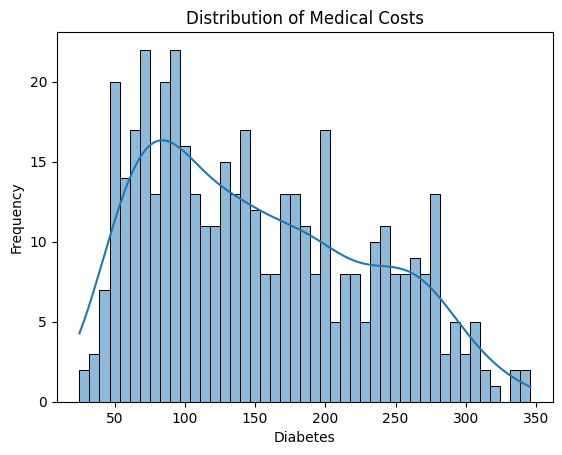

In [52]:
sns.histplot(y, kde=True, bins=45)
plt.xlabel("Diabetes")
plt.ylabel("Frequency")
plt.title("Distribution of Medical Costs")
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import root_mean_squared_error

a=[]
for i in range(0,10):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
    model=LinearRegression(n_jobs=-1)
    cv_scores=list(cross_val_score(model, x_train, y_train, scoring="r2", cv=6, n_jobs=-1))
    a.append(cv_scores)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    a[i].extend([model.score(x_test, y_test)])
    a[i].extend([model.score(x_train, y_train)])
    a[i].extend([root_mean_squared_error(y_test, pred)])

cols=["seed_cv_r2_"+str(i) for i in range(0,6)]+["test_r2", "train_r2", "test_rmse"]
testing_scores=pd.DataFrame(a,columns=cols)

In [54]:
testing_scores

,seed_cv_r2_0,seed_cv_r2_1,seed_cv_r2_2,seed_cv_r2_3,seed_cv_r2_4,seed_cv_r2_5,test_r2,train_r2,test_rmse
0,0.511200,0.447498,0.480194,0.504041,0.621319,0.561458,0.332233,0.553925,58.517171
1,0.412936,0.446094,0.497386,0.493095,0.555482,0.508020,0.438432,0.533228,54.704490
2,0.557139,0.275264,0.520329,0.547550,0.458892,0.478706,0.439934,0.532367,55.627841
3,0.468665,0.306845,0.586377,0.505065,0.550798,0.500323,0.416179,0.536650,56.224667
4,0.507740,0.536752,0.484769,0.453169,0.495517,0.458837,0.461099,0.526674,54.215848
5,0.492686,0.421936,0.385924,0.541036,0.516625,0.438140,0.527156,0.511552,54.603913
6,0.417885,0.478159,0.403475,0.485234,0.531547,0.561282,0.458147,0.525246,54.398765
7,0.585052,0.575160,0.371723,0.492995,0.470285,0.462987,0.404300,0.536781,54.461450
8,0.323789,0.529745,0.558234,0.470168,0.444214,0.454650,0.497350,0.518616,54.202134
9,0.561688,0.442570,0.324753,0.660124,0.473224,0.321712,0.585114,0.497921,47.516301


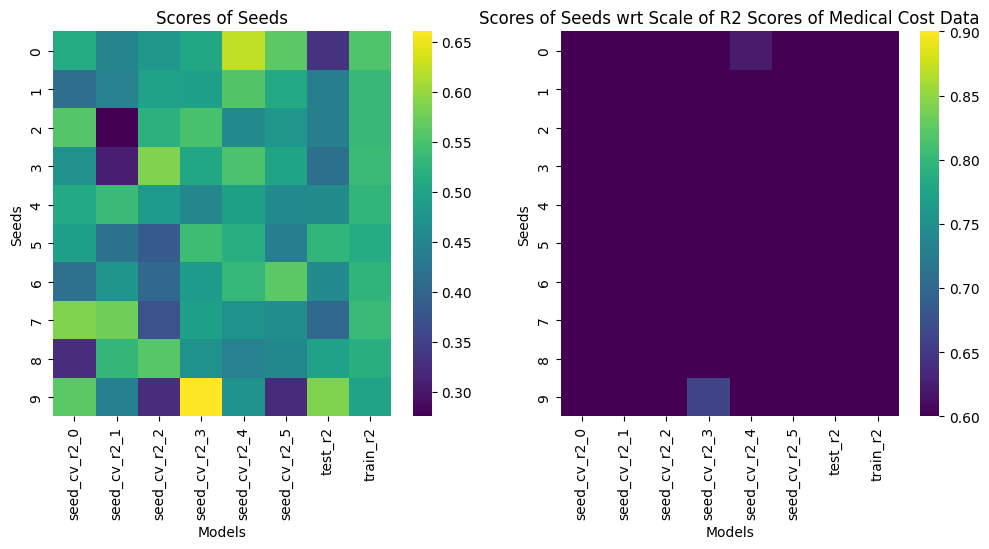

In [55]:
# r2 stability using no scale and scales of r2 scores of the medical housing data
_, axes = plt.subplots(1,2, figsize=(12, 5))
sns.heatmap(testing_scores.drop(["test_rmse"], axis=1), cmap="viridis", cbar=True, yticklabels=True, xticklabels=True, ax=axes[0])
axes[0].set_xlabel("Models")
axes[0].set_ylabel("Seeds")
axes[0].set_title("Scores of Seeds")
sns.heatmap(testing_scores.drop(["test_rmse"], axis=1), cmap="viridis", cbar=True, yticklabels=True, xticklabels=True, vmin=0.6, vmax=0.9, ax=axes[1])
axes[1].set_xlabel("Models")
axes[1].set_ylabel("Seeds")
axes[1].set_title("Scores of Seeds wrt Scale of R2 Scores of Medical Cost Data")
plt.show()

In [56]:
y=y*1700

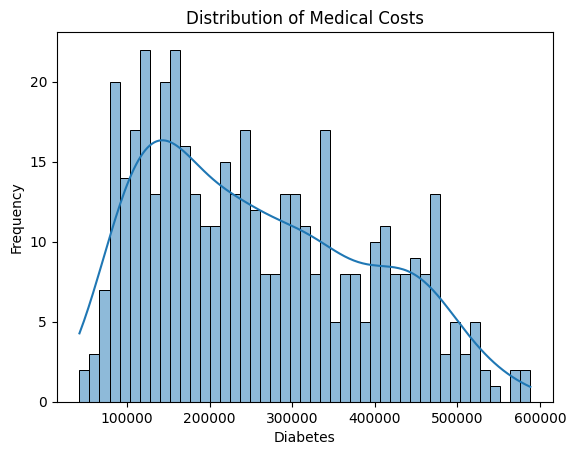

In [57]:
sns.histplot(y, kde=True, bins=45)
plt.xlabel("Diabetes")
plt.ylabel("Frequency")
plt.title("Distribution of Medical Costs")
plt.show()

In [58]:
a=[]
for i in range(0,10):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
    model=LinearRegression(n_jobs=-1)
    cv_scores=list(cross_val_score(model, x_train, y_train, scoring="r2", cv=6, n_jobs=-1))
    a.append(cv_scores)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    a[i].extend([model.score(x_test, y_test)])
    a[i].extend([model.score(x_train, y_train)])
    a[i].extend([root_mean_squared_error(y_test, pred)])

cols=["seed_cv_r2_"+str(i) for i in range(0,6)]+["test_r2", "train_r2", "test_rmse"]
testing_scores=pd.DataFrame(a,columns=cols)

In [59]:
testing_scores

,seed_cv_r2_0,seed_cv_r2_1,seed_cv_r2_2,seed_cv_r2_3,seed_cv_r2_4,seed_cv_r2_5,test_r2,train_r2,test_rmse
0,0.511200,0.447498,0.480194,0.504041,0.621319,0.561458,0.332233,0.553925,99479.191171
1,0.412936,0.446094,0.497386,0.493095,0.555482,0.508020,0.438432,0.533228,92997.633049
2,0.557139,0.275264,0.520329,0.547550,0.458892,0.478706,0.439934,0.532367,94567.329352
3,0.468665,0.306845,0.586377,0.505065,0.550798,0.500323,0.416179,0.536650,95581.933312
4,0.507740,0.536752,0.484769,0.453169,0.495517,0.458837,0.461099,0.526674,92166.941820
5,0.492686,0.421936,0.385924,0.541036,0.516625,0.438140,0.527156,0.511552,92826.651935
6,0.417885,0.478159,0.403475,0.485234,0.531547,0.561282,0.458147,0.525246,92477.900594
7,0.585052,0.575160,0.371723,0.492995,0.470285,0.462987,0.404300,0.536781,92584.464541
8,0.323789,0.529745,0.558234,0.470168,0.444214,0.454650,0.497350,0.518616,92143.627616
9,0.561688,0.442570,0.324753,0.660124,0.473224,0.321712,0.585114,0.497921,80777.712405


6- Comparison of the Stability of the Model and Data Quality

In [60]:
## 🔍 Findings
# certainly the rmse is better without scaling, after scaling the rmse exploded
# r2 is unreliable, it was low but gave very less rmse, plus it varied a lot especially difference was high between test and train rmse
# The constrast is clear the consistency is R2 was better in Medical data, this means the real culprit is the target variable for medical data

7- Monte Carlo Simulation

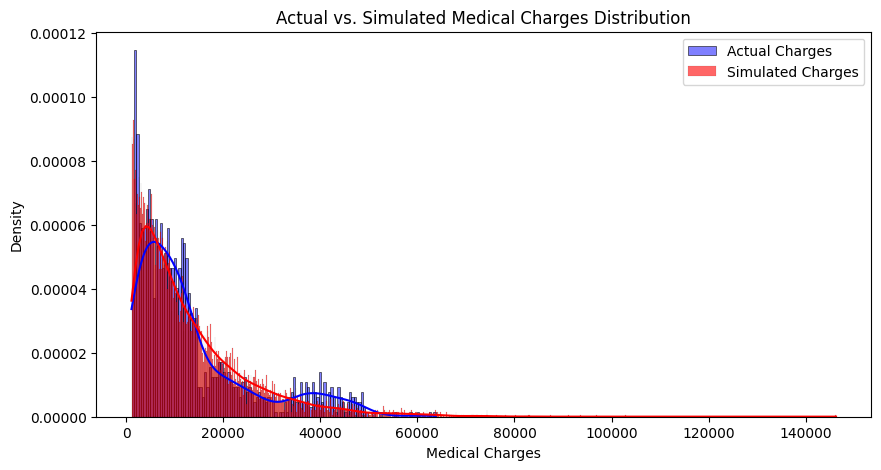

95% Confidence Interval for Medical Costs: [ 1411.99295807 45307.43852539]
80% Confidence Interval for Medical Costs: [ 2397.1833374  28877.89962158]


In [61]:
y=data_fresh["charges"]
shape, loc, scale = stats.pareto.fit(y)

num_simulations = 10000
simulated_charges = stats.pareto.rvs(shape, loc=loc, scale=scale, size=num_simulations)

plt.figure(figsize=(10, 5))
sns.histplot(y, bins=130, kde=True, color="blue", label="Actual Charges", stat="density")
sns.histplot(simulated_charges, bins=1000, kde=True, color="red", label="Simulated Charges", stat="density", alpha=0.6)
plt.xlabel("Medical Charges")
plt.ylabel("Density")
plt.title("Actual vs. Simulated Medical Charges Distribution")
plt.legend()
plt.show()

conf_95 = np.percentile(simulated_charges, [2.5, 97.5])
conf_80 = np.percentile(simulated_charges, [10, 90])

print(f"95% Confidence Interval for Medical Costs: {conf_95}")
print(f"80% Confidence Interval for Medical Costs: {conf_80}")

In [62]:
# here also we can easily see that high values are the problem, our data had higher density at the tail
# our data didn't had data at the extremes of the tail, while simulation created so
# the confidence interval too is too wide [1442.63666077 46137.0876236]
# so simulation too is unreliable

In [63]:
## breaking down target dist based on independent variable smoker

In [64]:
y=data_fresh[data_fresh["smoker"]==1]["charges"]
fitter=Fitter(y)
fitter.fit()
print(fitter.get_best(method="sumsquare_error"))

{'dweibull': {'c': 2.105075206970067, 'loc': 31243.197218619942, 'scale': 11665.853874780458}}


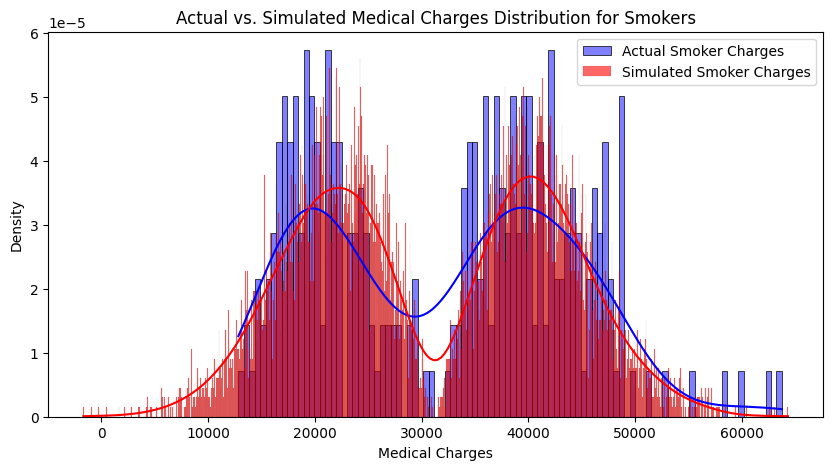

95% Confidence Interval for Smoker Medical Costs: [11617.21380292 50936.83317434]
80% Confidence Interval for Smoker Medical Costs: [16497.51532753 45536.57142854]


In [65]:
num_simulations = 10000
simulated_smoker_charges = stats.dweibull.rvs(2.105075206970067, loc=31243.197218619942, scale=11665.853874780458, size=num_simulations)

plt.figure(figsize=(10, 5))
sns.histplot(y, bins=100, kde=True, color="blue", label="Actual Smoker Charges", stat="density")
sns.histplot(simulated_smoker_charges, bins=1000, kde=True, color="red", label="Simulated Smoker Charges", stat="density", alpha=0.6)
plt.xlabel("Medical Charges")
plt.ylabel("Density")
plt.title("Actual vs. Simulated Medical Charges Distribution for Smokers")
plt.legend()
plt.show()

conf_95_smoker = np.percentile(simulated_smoker_charges, [2.5, 97.5])
conf_80_smoker = np.percentile(simulated_smoker_charges, [10, 90])

print(f"95% Confidence Interval for Smoker Medical Costs: {conf_95_smoker}")
print(f"80% Confidence Interval for Smoker Medical Costs: {conf_80_smoker}")

In [66]:
# 📌 What is Skewness and Kurtosis?
# Skewness and kurtosis are statistical measures that describe the shape of a probability distribution.

# 🔹 1️⃣ Skewness (Asymmetry of the Distribution)
# ✅ Skewness tells us whether the data is symmetric or has a long tail on one side.
# ✅ Formula
 
# ✅ Types of Skewness:

# Positive Skew (Right-Skewed, Skewness > 0) → Long tail on the right (e.g., income, medical costs).
# Negative Skew (Left-Skewed, Skewness < 0) → Long tail on the left.
# Zero Skew (Symmetric, Skewness = 0) → Balanced left and right tails (e.g., Normal distribution).
# 📌 DWeibull (Double Weibull) & Skewness

# DWeibull is flexible—it can be left-skewed, right-skewed, or symmetric based on the shape parameter (c).
# If c < 2.63, DWeibull is left-skewed.
# If c > 2.63, DWeibull is right-skewed (like Pareto & Medical Costs).
# 🔹 2️⃣ Kurtosis (Peakedness & Tail Heaviness)
# ✅ Kurtosis tells us how heavy the tails are compared to a normal distribution.
# ✅ Formula:

# ✅ Types of Kurtosis:

# Leptokurtic (Kurtosis > 3) → Heavy tails (e.g., financial crashes, extreme medical costs).
# Mesokurtic (Kurtosis = 3) → Normal tails (e.g., Normal distribution).
# Platykurtic (Kurtosis < 3) → Light tails (e.g., Uniform distribution).
# 📌 DWeibull & Kurtosis

# DWeibull can be platykurtic, mesokurtic, or leptokurtic depending on c.
# For c > 2.63, kurtosis is high, meaning it has heavier tails than normal.
# For c < 2.63, kurtosis is lower, meaning less extreme tail behavior.
# 📌 Why Does Skewness & Kurtosis Matter for Medical Costs?
# ✅ Medical Costs are Right-Skewed (few high-cost cases).
# ✅ Medical Costs are Leptokurtic (heavy tails → extreme high-cost events).
# ✅ DWeibull is flexible enough to capture different skewness & kurtosis levels.
# ✅ If the simulated data has similar skewness & kurtosis to actual data, it confirms the model is realistic.

# 📌 Next Steps: Do You Want to Compute Skewness & Kurtosis for Simulated vs. Actual Data?
# I can provide the code to compare skewness & kurtosis for both real and simulated data 🚀.

In [67]:
actual_skewness = stats.skew(y)
simulated_skewness = stats.skew(simulated_smoker_charges)

actual_kurtosis = stats.kurtosis(y, fisher=True)  # Fisher=True gives excess kurtosis
simulated_kurtosis = stats.kurtosis(simulated_smoker_charges, fisher=True)

print(f"Actual Data - Skewness: {actual_skewness}, Kurtosis: {actual_kurtosis}")
print(f"Simulated Data - Skewness: {simulated_skewness}, Kurtosis: {simulated_kurtosis}")

Actual Data - Skewness: 0.127514285857385, Kurtosis: -1.0395337984245214
Simulated Data - Skewness: -0.0020383399850355654, Kurtosis: -1.106964114386424


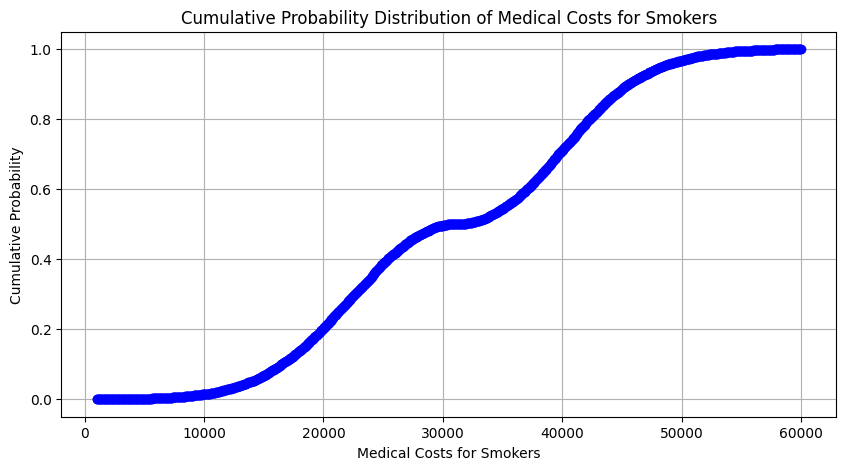

Probability that medical costs are ≤ $5000: 0.19%
Probability that medical costs are ≤ $10000: 1.46%
Probability that medical costs are ≤ $20000: 20.26%
Probability that medical costs are ≤ $30000: 49.62%
Probability that medical costs are ≤ $40000: 71.10%
Probability that medical costs are ≤ $50000: 96.69%
Probability that medical costs are ≤ $60000: 99.94%


In [68]:
cost_range = np.linspace(1000, 60000, 1000)

cumulative_probs = [np.mean(simulated_smoker_charges <= t) for t in cost_range]

plt.figure(figsize=(10, 5))
plt.plot(cost_range, cumulative_probs, marker='o', linestyle='-', color='b')
plt.xlabel("Medical Costs for Smokers")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Probability Distribution of Medical Costs for Smokers")
plt.grid()
plt.show()

thresholds = [5000, 10000, 20000, 30000, 40000, 50000, 60000]
cumulative_probs_dict = {t: np.mean(simulated_smoker_charges <= t) for t in thresholds}

for t, prob in cumulative_probs_dict.items():
    print(f"Probability that medical costs are ≤ ${t}: {prob * 100:.2f}%")

In [69]:
# 🔍 Key Findings
# ✅ Skewness is Nearly Identical (Close to 0)

# The actual data and simulated data both lack extreme skew, meaning DWeibull captured the balance between left & right tails well.
# This suggests no strong long-tail effect for smokers—most costs are centered.
# ✅ Kurtosis is Negative, Confirming Lighter Tails

# Both distributions have platykurtic behavior (fewer extreme values than a normal distribution).
# This means our model correctly avoids generating too many extreme outliers.
# ✅ Monte Carlo Simulation is Doing a Good Job!

# Since skewness and kurtosis are nearly identical, the simulated distribution closely follows the actual data's shape.
# The previous issue of extreme outliers (feature-agnostic simulation) is resolved.

In [70]:
# our simulation is doing a better job at the tails now, even in the depression in the middle

In [71]:
y=data_fresh[data_fresh["smoker"]==0]["charges"]
fitter=Fitter(y)
fitter.fit()
print(fitter.get_best(method="sumsquare_error"))

{'kappa3': {'a': 3.959511218708493, 'loc': 1120.11501979869, 'scale': 8505.389143082099}}


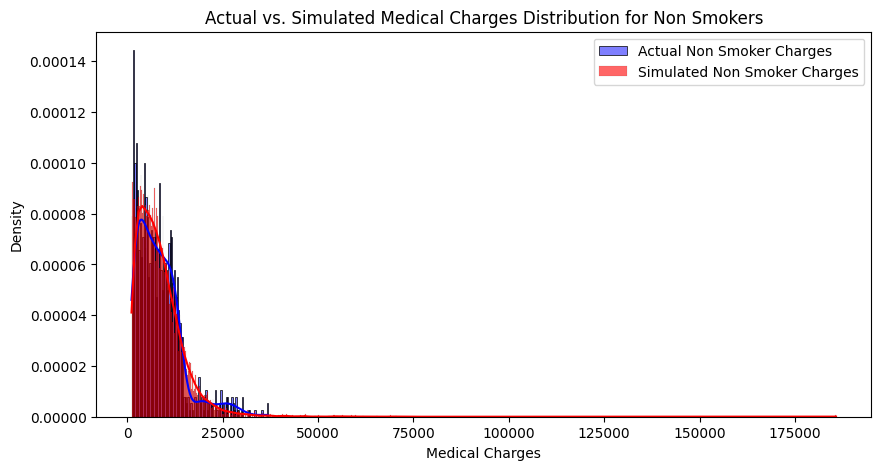

95% Confidence Interval for Non Smoker Medical Costs: [ 1419.81266842 22648.99505621]
80% Confidence Interval for Non Smoker Medical Costs: [ 2339.34715033 15476.13247916]


In [72]:
num_simulations = 10000
simulated_non_smoker_charges = stats.kappa3.rvs(3.959511218708493, loc=1120.11501979869, scale=8505.389143082099, size=num_simulations)
plt.figure(figsize=(10, 5))
sns.histplot(y, bins=100, kde=True, color="blue", label="Actual Non Smoker Charges", stat="density")
sns.histplot(simulated_non_smoker_charges, bins=1000, kde=True, color="red", label="Simulated Non Smoker Charges", stat="density", alpha=0.6)
plt.xlabel("Medical Charges")
plt.ylabel("Density")
plt.title("Actual vs. Simulated Medical Charges Distribution for Non Smokers")
plt.legend()
plt.show()

conf_95_smoker = np.percentile(simulated_non_smoker_charges, [2.5, 97.5])
conf_80_smoker = np.percentile(simulated_non_smoker_charges, [10, 90])

print(f"95% Confidence Interval for Non Smoker Medical Costs: {conf_95_smoker}")
print(f"80% Confidence Interval for Non Smoker Medical Costs: {conf_80_smoker}")

In [73]:
actual_skewness = stats.skew(y)
simulated_skewness = stats.skew(simulated_non_smoker_charges)

actual_kurtosis = stats.kurtosis(y, fisher=True)
simulated_kurtosis = stats.kurtosis(simulated_non_smoker_charges, fisher=True)

print(f"Actual Data - Skewness: {actual_skewness}, Kurtosis: {actual_kurtosis}")
print(f"Simulated Data - Skewness: {simulated_skewness}, Kurtosis: {simulated_kurtosis}")

Actual Data - Skewness: 1.5359507841880062, Kurtosis: 3.128807075311488
Simulated Data - Skewness: 4.195020064349973, Kurtosis: 73.24586576391343


In [74]:
# lets clip the data

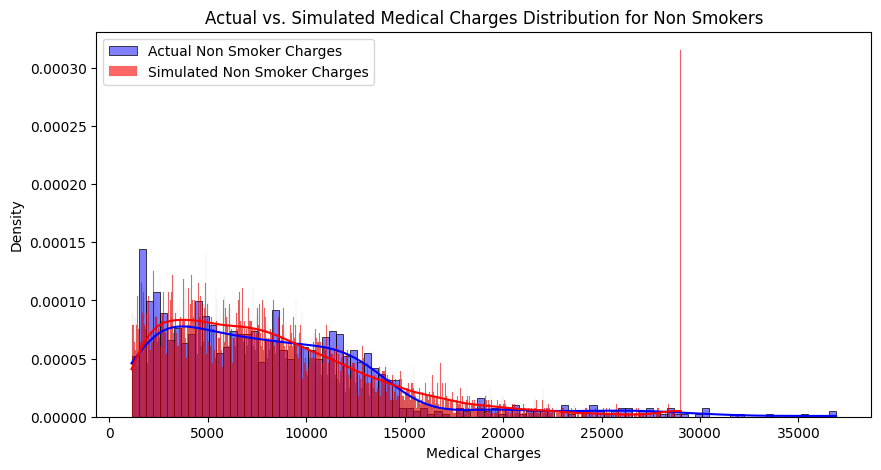

95% Confidence Interval for Non Smoker Medical Costs: [ 1438.38939856 22291.9471287 ]
80% Confidence Interval for Non Smoker Medical Costs: [ 2349.64414823 15445.22928622]


In [75]:
num_simulations = 10000
simulated_non_smoker_charges = stats.kappa3.rvs(3.959511218708493, loc=1120.11501979869, scale=8505.389143082099, size=num_simulations)
simulated_non_smoker_charges = np.clip(simulated_non_smoker_charges, None, np.percentile(y, 99))
plt.figure(figsize=(10, 5))
sns.histplot(y, bins=100, kde=True, color="blue", label="Actual Non Smoker Charges", stat="density")
sns.histplot(simulated_non_smoker_charges, bins=1000, kde=True, color="red", label="Simulated Non Smoker Charges", stat="density", alpha=0.6)
plt.xlabel("Medical Charges")
plt.ylabel("Density")
plt.title("Actual vs. Simulated Medical Charges Distribution for Non Smokers")
plt.legend()
plt.show()

conf_95_smoker = np.percentile(simulated_non_smoker_charges, [2.5, 97.5])
conf_80_smoker = np.percentile(simulated_non_smoker_charges, [10, 90])

print(f"95% Confidence Interval for Non Smoker Medical Costs: {conf_95_smoker}")
print(f"80% Confidence Interval for Non Smoker Medical Costs: {conf_80_smoker}")

In [76]:
actual_skewness = stats.skew(y)
simulated_skewness = stats.skew(simulated_non_smoker_charges)

actual_kurtosis = stats.kurtosis(y, fisher=True)
simulated_kurtosis = stats.kurtosis(simulated_non_smoker_charges, fisher=True)

print(f"Actual Data - Skewness: {actual_skewness}, Kurtosis: {actual_kurtosis}")
print(f"Simulated Data - Skewness: {simulated_skewness}, Kurtosis: {simulated_kurtosis}")

Actual Data - Skewness: 1.5359507841880062, Kurtosis: 3.128807075311488
Simulated Data - Skewness: 1.2219222072953988, Kurtosis: 1.7679781075680054


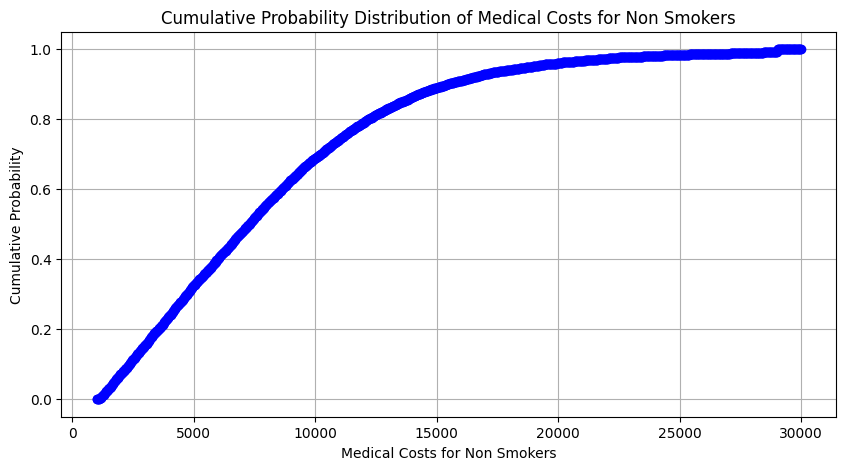

Probability that medical costs are ≤ $5000: 32.46%
Probability that medical costs are ≤ $10000: 68.87%
Probability that medical costs are ≤ $20000: 96.03%
Probability that medical costs are ≤ $30000: 100.00%


In [77]:
cost_range = np.linspace(1000, 30000, 1000)

cumulative_probs = [np.mean(simulated_non_smoker_charges <= t) for t in cost_range]

plt.figure(figsize=(10, 5))
plt.plot(cost_range, cumulative_probs, marker='o', linestyle='-', color='b')
plt.xlabel("Medical Costs for Non Smokers")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Probability Distribution of Medical Costs for Non Smokers")
plt.grid()
plt.show()

thresholds = [5000, 10000, 20000, 30000]
cumulative_probs_dict = {t: np.mean(simulated_non_smoker_charges <= t) for t in thresholds}

for t, prob in cumulative_probs_dict.items():
    print(f"Probability that medical costs are ≤ ${t}: {prob * 100:.2f}%")

In [78]:
# our simulated data actually captures the actual data of smoker and non smokers 
# Monte Carlo appears to be more helpful